# Import Libraries & Data for Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *
import pylab

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv('../CSV Files/linreg_ready_data.csv')
display(df.shape)
display(df.columns)

(20110, 71)

Index(['log_price', 'log_sqft_living', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zi

***
## Assumptions of OLS Model

Each assumption if violated means we may have to take extra steps to improve our model or in some cases dump the model altogether. Here is a list of the assumptions of the model:

- 1. A linear relationship is assumed between the dependent variable and the independent variables.
- 2. Regression residuals must be normally distributed.
- 3. The residuals are homoscedastic and approximately rectangular-shaped.
- 4. Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- 5. No Autocorrelation of the residuals.

I will be explaining these assumptions in more detail as we arrive at each of them in the tutorial. At this point, however, we need to have an idea of what they are.

# Build The Model

#### Create Test : Train Split

In [3]:
#hprint(values_to_be_dropped)
#after running the model delete the hash to see what columns need to be dropped from dataframe

df = df.drop(columns=['zipcode_98023','zipcode_98032'], axis=1)

In [4]:
# define our input variable (X) & output variable
X = df.drop(columns=['log_price'], axis=1)
Y = df[['log_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Explore The Output

In [5]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = float(regression_model.coef_[0][0])

print("The intercept for our model is {:}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.3}".format(coef[0],coef[1]))

The intercept for our model is 7.432651901502438
----------------------------------------------------------------------------------------------------
The Coefficient for log_sqft_living is 0.674
The Coefficient for zipcode_98002 is -0.0425
The Coefficient for zipcode_98003 is 0.0331
The Coefficient for zipcode_98004 is 1.18
The Coefficient for zipcode_98005 is 0.84
The Coefficient for zipcode_98006 is 0.759
The Coefficient for zipcode_98007 is 0.711
The Coefficient for zipcode_98008 is 0.714
The Coefficient for zipcode_98010 is 0.23
The Coefficient for zipcode_98011 is 0.469
The Coefficient for zipcode_98014 is 0.346
The Coefficient for zipcode_98019 is 0.327
The Coefficient for zipcode_98022 is 0.0784
The Coefficient for zipcode_98024 is 0.462
The Coefficient for zipcode_98027 is 0.594
The Coefficient for zipcode_98028 is 0.447
The Coefficient for zipcode_98029 is 0.663
The Coefficient for zipcode_98030 is 0.0515
The Coefficient for zipcode_98031 is 0.0862
The Coefficient for zipcode_

# Evaluate the Model

In [6]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2,hasconst=True)

# fit the data
est = model.fit()

# check the data
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1306.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:52:50   Log-Likelihood:                 3668.8
No. Observations:               20110   AIC:                            -7200.
Df Residuals:                   20041   BIC:                            -6654.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4397      0.031    2

In [7]:
(abs(df.corr().log_price).sort_values(ascending=False) > .1).sum()

25

## Hypothesis Testing

With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis:** There is no relationship between the exploratory variables and the dependent variable.
- **Alternative Hypothesis:** There is a relationship between the exploratory variables and the dependent variable.
***
- If we **reject the null**, we are saying there is a relationship, and the coefficients do not equal 0.
- If we **fail to reject the null**, we are saying there is no relationship, and the coefficients do equal 0
***

## Assumption 1
- A linear relationship is assumed between the dependent variable and the independent variables.

In [8]:
#return to top of notebook and remove these columns
values_to_be_dropped = est.pvalues.loc[est.pvalues>.05]
est.pvalues.loc[est.pvalues>=.05]

Series([], dtype: float64)

Text(0.5, 1.0, 'Parameter Pvalue Distribution')

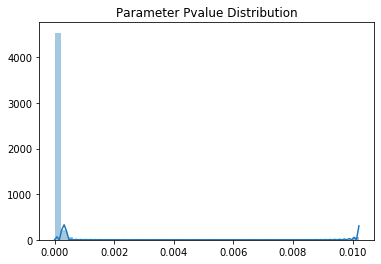

In [9]:
sns.distplot(est.pvalues)
plt.title("Parameter Pvalue Distribution")

**If there are no values present in the output above we reject the null hypothesis and all varaiables in our model are significant.**



## Assumption 2
### Normally Distributed Residuals
- Regression residuals must be normally distributed.

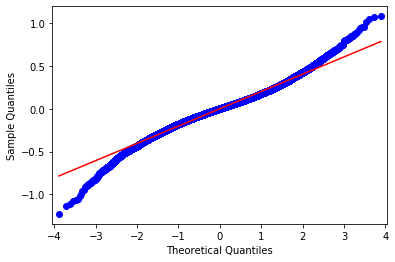

The mean of the residuals is 1.253e-14


In [10]:
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

**This is not an airtight test as we can see the residuals on the tails break away from the line, but to me this does not look terrible as it is not until 2 deviations where it begins to take off. The mean of the residuals is still near 0.**

## Assumption 3
- The residuals are homoscedastic and approximately rectangular-shaped.

### White's Test for heteroscedasticity

In [11]:
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print("Pval:",pval,"************ F_pval:", f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")



Pval: 5.203411872121607e-266 ************ F_pval: 7.825766394899378e-280
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 5.203e-266
We reject the null hypthoesis, so there is heterosecdasticity. 



### Breusch-Pagan's Test for Homoskedasticity

In [12]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print("Pval:",pval,"************ F_pval:", f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is Homoskedasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is no Homoskedasticity.")

Pval: 4.144787067358851e-198 ************ F_pval: 8.676129540258215e-205
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 4.145e-198
We reject the null hypthoesis, so there is no Homoskedasticity.


## Assumption 4
### Multicolinearality

In [13]:
# the VIF does expect a constant term in the data, so we need to add one using the add_constant method
X3 = sm.tools.add_constant(X)

# create the series for both
vif = pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])], index=X3.columns)

#checking for values greater than 3
display(vif.loc[vif >= 3])



const    466.215579
dtype: float64

A general recommendation is that if any of our variables come back with a value of 5 or higher, then they should be removed from the model. I decided to show you how the VFI comes out before we drop the highly correlated variables and after we remove the highly correlated variables.

**If no values (besides constant) greater than 5 there is no multicolinearality present**


## Assumption 5 
### Autocorrelation


### Durbin-Watson Test for Autocorrelation
***
### How to test for autocorrelation?
We will go to the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

- **H0: The data are random.**
- **Ha: The data are not random.**

That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the `acorr_ljungbox` function, pass through the `est.resid` and then define the lags. 

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be `min((num_obs // 2 - 2), 40)`, however, there is a rule of thumb that for non-seasonal time series the lag is ` min(10, (num_obs // 5))`.

We also can visually check for autocorrelation by using the `statsmodels.graphics` module to plot a graph of the autocorrelation factor.

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.4288
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\blake\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


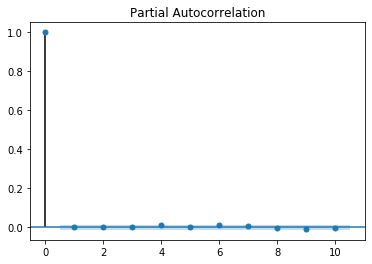

In [14]:
# calculate the lag, optional
lag = min(10, (len(X)//5))
#lag2 = min((len(X) // 2 - 2),40)
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
#test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_pacf(est.resid,lags=lag)
plt.show()

### Model Accuracy Test

In [15]:
cv_results  = cross_val_score(regression_model, X_test, y_test, cv=5)
print("Accuracy: %0.3f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.817 (+/- 0.03)


### Make Predictions to Test the Model

In [16]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_dollars = np.e**y_predict
y_dollars[:5].round(2)

array([[383836.44],
       [312834.87],
       [640324.52],
       [289162.23],
       [600954.6 ]])

In [17]:
# calculate the mean squared error
model_mse = mean_squared_error(np.e**y_test, np.e**y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(np.e**y_test, np.e**y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print(f"MSE = ${round(model_mse,2)} ")

print(f"MAE = ${round(model_mae,2)}")

print(f"RMSE = ${round(model_rmse,2)}")

MSE = $11715575217.32 
MAE = $73233.34
RMSE = $108238.51


# Save for Later Use

In [18]:
import pickle

# pickle the model.
with open('kc_county_multilinreg.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in to see if everything works
with open('kc_county_multilinreg.sav', 'rb') as pickle_file:
     kc_county_houseprice_predictor = pickle.load(pickle_file)

### Bring back in to see if regression still works

In [19]:
print(X_test.iloc[1])
print('*'*100)
print('*'*100)
print('These are the data points:',X_test.iloc[1].loc[X_test.iloc[1] > 1])


log_sqft_living    7.700748
zipcode_98002      0.000000
zipcode_98003      1.000000
zipcode_98004      0.000000
zipcode_98005      0.000000
                     ...   
zipcode_98177      0.000000
zipcode_98178      0.000000
zipcode_98188      0.000000
zipcode_98198      0.000000
zipcode_98199      0.000000
Name: 9515, Length: 68, dtype: float64
****************************************************************************************************
****************************************************************************************************
These are the data points: log_sqft_living    7.700748
Name: 9515, dtype: float64


In [20]:
kc_county_houseprice_predictor.predict(np.array(X_test[:1]))


array([[12.8579718]])

In [21]:
#function located in my_func.py to convert log output to readable dollars
log_to_dollars(kc_county_houseprice_predictor.predict(X_test[:1]))

array([[383836.44]])

In [22]:
kc_county_houseprice_predictor.predict(np.array(X_test[46:47]))

array([[12.55640263]])

In [23]:
from my_func import *

#output test was a numpy array so just did this so you can see a dollar value
np.asscalar(log_to_dollars(kc_county_houseprice_predictor.predict(X_test[46:47])))

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


283907.18